In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_alpine_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Alpha-Pinene
0,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.106952
1,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.106952
2,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.106952
3,2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,...,0.146141,0.174652,-0.146565,0.217158,-0.712819,0.046792,-0.744437,-0.214183,-0.707376,0.106952
4,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.237772,0.120746,0.629375,0.104186,0.032603,-0.432701,0.764779,0.083739,-0.119063,...,0.171331,0.111348,-0.115894,0.320711,-0.736399,0.117869,-0.834123,-0.191543,-0.876954,0.021390
59996,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.021390
59997,42971,0.219584,0.143236,0.539909,0.086895,-0.006281,-0.389946,0.806679,0.186327,-0.065521,...,0.142024,0.141072,-0.212327,0.300115,-0.697690,0.069458,-0.770859,-0.155446,-0.747328,0.021390
59998,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.021390


In [4]:
X = df_mlp.drop(['index', 'X..Alpha-Pinene'], axis = 1)
y = df_mlp[['X..Alpha-Pinene']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

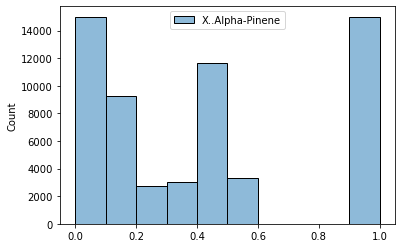

In [5]:
sns.histplot(y, bins = 10)

PCA

In [6]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [7]:
pca_comps

array([[ 1.72445382e+00, -6.10912187e-01, -2.74417797e-01, ...,
        -2.56365376e-03,  5.24716301e-04, -2.32476012e-08],
       [ 1.72445382e+00, -6.10912187e-01, -2.74417797e-01, ...,
        -2.56365376e-03,  5.24716301e-04, -2.32476079e-08],
       [-6.67419650e-01, -1.63826940e-01,  4.62091127e-01, ...,
         4.77574936e-04, -1.95786212e-03, -4.77250001e-08],
       ...,
       [-7.18483656e-01, -2.26408253e-01,  1.13179451e-01, ...,
         2.16486900e-03, -7.76386063e-04, -2.43678514e-08],
       [-1.60392496e+00,  3.98935142e-01, -2.72050637e-01, ...,
         3.04857414e-03,  3.63112169e-03, -2.75712020e-08],
       [-2.51735411e+00,  1.12599550e+00, -9.46549815e-02, ...,
         4.06109998e-04, -9.49540613e-04,  5.89113878e-08]])

In [8]:
type(pca_comps)

numpy.ndarray

In [9]:
explained_variance = pca.explained_variance_ratio_

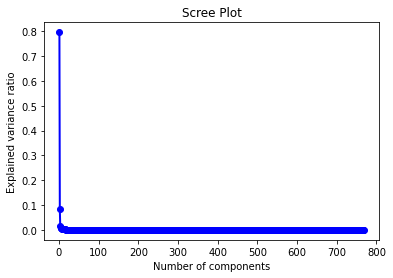

In [10]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [12]:
n_components_optimal

1

In [13]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [14]:
X_reduced

array([[ 1.72445382],
       [ 1.72445382],
       [-0.66741965],
       ...,
       [-0.71848366],
       [-1.60392496],
       [-2.51735411]])

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [17]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlp)

0.30245939411467554

In [19]:
mean_squared_error(y_val, y_pred_mlp)

0.12824447750529433

In [20]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.35811238111142474

In [21]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.040421042316421185

In [22]:
#val
r2_score(y_val, y_pred_mlp)

0.043624578560839566

Hyperparameter tuning (MLP)

In [23]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [24]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [25]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [26]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [27]:
joblib.dump(rscv, "rscv_mlp_bert_alpine.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_alpine.pkl")

['rscv_mlp_bert_best_params_alpine.pkl']

kNN (after hyperparameter tuning)

In [28]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'relu', hidden_layer_sizes= (50,50,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.29015885983463313

In [30]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.11642441080418779

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.34121021497632187

In [32]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.12838868383629543

In [33]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.13177200987805215

Predicting on the test set (MLP)

In [34]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [35]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_alpine.pkl")
joblib.dump(y_test, "y_test_mlp_bert_alpine.pkl")

['y_test_mlp_bert_alpine.pkl']

In [36]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.28989317699276307

In [37]:
mean_squared_error(y_test, y_pred_mlp_test)

0.11589456905162658

In [38]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.34043291417197985

In [39]:
r2_score(y_test, y_pred_mlp_test)

0.13324562593737121

Error analysis (kNN)

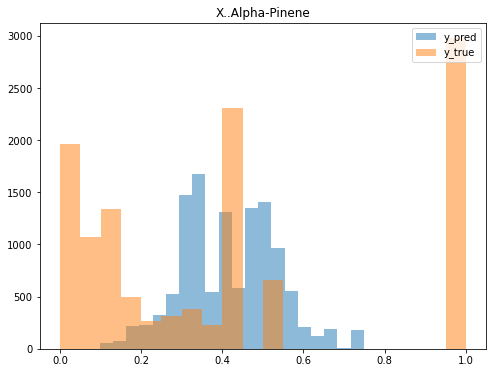

<Figure size 432x288 with 0 Axes>

In [40]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_alpine.png')

Pearson R

In [41]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.369
P-value: 0.000


<AxesSubplot:>

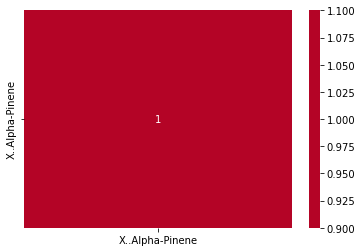

In [42]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)